In [1]:
import pandas as pd
data = pd.read_csv('train.csv')

In [2]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 317 entries, 0 to 316
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      317 non-null    object
 1   sex         317 non-null    object
 2   age         317 non-null    int64 
 3   address     317 non-null    object
 4   famsize     317 non-null    object
 5   Pstatus     317 non-null    object
 6   Medu        317 non-null    int64 
 7   Fedu        317 non-null    int64 
 8   Mjob        317 non-null    object
 9   Fjob        317 non-null    object
 10  reason      317 non-null    object
 11  guardian    317 non-null    object
 12  traveltime  317 non-null    int64 
 13  studytime   317 non-null    int64 
 14  failures    317 non-null    int64 
 15  schoolsup   317 non-null    object
 16  famsup      317 non-null    object
 17  paid        317 non-null    object
 18  activities  317 non-null    object
 19  nursery     317 non-null    object
 20  higher    

In [3]:
# 원본 데이터 읽기
data = pd.read_csv('./train.csv')

# 필요한 열에 대해 원-핫 인코딩 수행
encoded_columns = pd.get_dummies(data[['school', 'sex', 'address', 'famsize', 'Pstatus', 'Fjob', 'Mjob', 'reason', 'guardian', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic']])
encoded_columns = encoded_columns.astype(int)

# 원본 데이터와 인코딩된 데이터 결합
ndata = pd.concat([data, encoded_columns], axis=1)

# 인코딩된 범주형 열 삭제
ndata.drop(['school', 'sex', 'address', 'famsize', 'Pstatus', 'Fjob', 'Mjob', 'reason', 'guardian', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic'], axis=1, inplace=True)

# 원-핫 인코딩된 데이터를 CSV 파일로 저장
csv_path = './combined_encoded_data.csv'
ndata.to_csv(csv_path, index=False)

In [4]:
ndata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 317 entries, 0 to 316
Data columns (total 59 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   age                317 non-null    int64
 1   Medu               317 non-null    int64
 2   Fedu               317 non-null    int64
 3   traveltime         317 non-null    int64
 4   studytime          317 non-null    int64
 5   failures           317 non-null    int64
 6   famrel             317 non-null    int64
 7   freetime           317 non-null    int64
 8   goout              317 non-null    int64
 9   Dalc               317 non-null    int64
 10  Walc               317 non-null    int64
 11  health             317 non-null    int64
 12  absences           317 non-null    int64
 13  G1                 317 non-null    int64
 14  G2                 317 non-null    int64
 15  G3                 317 non-null    int64
 16  school_GP          317 non-null    int32
 17  school_MS       

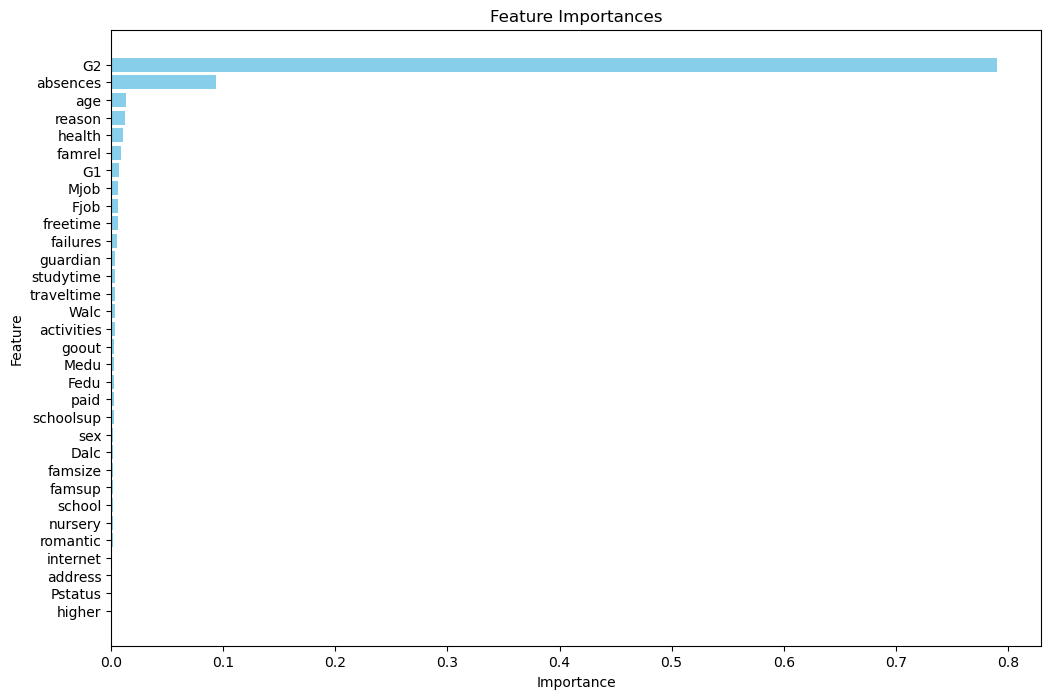

In [5]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

# 파일 경로 확인
data_path = './combined_encoded_data.csv'

# 데이터 로드
data = pd.read_csv(data_path)

# 입력 변수와 타겟 변수 분리
input_columns = data.columns.drop('G3')
grade_input = data[input_columns]
grade_target = data['G3']

# 데이터를 학습용과 테스트용으로 분할
train_input, test_input, train_target, test_target = train_test_split(grade_input, grade_target, random_state=42)

# RandomForestRegressor 학습
rf = RandomForestRegressor(n_jobs=-1, random_state=42)
rf.fit(train_input, train_target)

# 특성 중요도 계산
feature_importances = rf.feature_importances_

# 원핫 인코딩된 컬럼 이름들을 원래 특성 이름으로 묶기
original_feature_importances = {}
for feature, importance in zip(input_columns, feature_importances):
    original_feature = feature.split('_')[0]  # 원핫 인코딩 전의 원래 특성 이름 추출
    if original_feature not in original_feature_importances:
        original_feature_importances[original_feature] = 0
    original_feature_importances[original_feature] += importance

# 특성 중요도를 시각화하기 위해 DataFrame 생성
original_feature_importance_df = pd.DataFrame({
    'Feature': list(original_feature_importances.keys()),
    'Importance': list(original_feature_importances.values())
})

# 중요도 순으로 정렬
original_feature_importance_df_sorted = original_feature_importance_df.sort_values(by='Importance', ascending=False)

import matplotlib.pyplot as plt

# 특성 중요도를 시각화하기 위해 DataFrame 생성
original_feature_importance_df = pd.DataFrame({
    'Feature': list(original_feature_importances.keys()),
    'Importance': list(original_feature_importances.values())
})

# 중요도 순으로 정렬
original_feature_importance_df_sorted = original_feature_importance_df.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(12, 8))
plt.barh(original_feature_importance_df_sorted['Feature'], original_feature_importance_df_sorted['Importance'], color='skyblue')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importances')
plt.gca().invert_yaxis()  # 중요도가 높은 특성이 상단에 위치하도록 반전
plt.show()


In [6]:
from sklearn.ensemble import GradientBoostingRegressor

# Gradient Boosting Regressor 학습
gb = GradientBoostingRegressor(random_state=42)
gb.fit(train_input, train_target)

# 특성 중요도 계산
feature_importances_gb = gb.feature_importances_

# 원핫 인코딩된 컬럼 이름들을 원래 특성 이름으로 묶기
original_feature_importances_gb = {}
for feature, importance in zip(input_columns, feature_importances_gb):
    original_feature = feature.split('_')[0]  # 원핫 인코딩 전의 원래 특성 이름 추출
    if original_feature not in original_feature_importances_gb:
        original_feature_importances_gb[original_feature] = 0
    original_feature_importances_gb[original_feature] += importance

# 특성 중요도를 시각화하기 위해 DataFrame 생성
original_feature_importance_df_gb = pd.DataFrame({
    'Feature': list(original_feature_importances_gb.keys()),
    'Importance': list(original_feature_importances_gb.values())
})

# 중요도 순으로 정렬
original_feature_importance_df_sorted_gb = original_feature_importance_df_gb.sort_values(by='Importance', ascending=True)


least_important_gb = original_feature_importance_df_gb[original_feature_importance_df_gb['Importance'] < 0.001]
print(least_important_gb)


       Feature  Importance
1         Medu    0.000564
2         Fedu    0.000626
8        goout    0.000878
9         Dalc    0.000974
15      school    0.000277
16         sex    0.000199
17     address    0.000236
18     famsize    0.000806
19     Pstatus    0.000189
25      famsup    0.000000
26        paid    0.000549
27  activities    0.000438
28     nursery    0.000453
29      higher    0.000219
30    internet    0.000141
31    romantic    0.000271


In [7]:
# 원핫 인코딩된 컬럼 이름들을 원래 특성 이름으로 묶기
low_importance_features = [col for col in data.columns if any(low_feature in col for low_feature in least_important_gb['Feature'])]

# 원본 데이터에서 해당 특성들을 제거
data_reduced = data.drop(columns=low_importance_features)

# 새로운 CSV 파일로 저장
reduced_data_path = './reduced_combined_encoded_data.csv'
data_reduced.to_csv(reduced_data_path, index=False)

reduced_data_path


'./reduced_combined_encoded_data.csv'

In [8]:
data_reduced.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 317 entries, 0 to 316
Data columns (total 29 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   age                317 non-null    int64
 1   traveltime         317 non-null    int64
 2   studytime          317 non-null    int64
 3   failures           317 non-null    int64
 4   famrel             317 non-null    int64
 5   freetime           317 non-null    int64
 6   Walc               317 non-null    int64
 7   health             317 non-null    int64
 8   absences           317 non-null    int64
 9   G1                 317 non-null    int64
 10  G2                 317 non-null    int64
 11  G3                 317 non-null    int64
 12  Fjob_at_home       317 non-null    int64
 13  Fjob_health        317 non-null    int64
 14  Fjob_other         317 non-null    int64
 15  Fjob_services      317 non-null    int64
 16  Fjob_teacher       317 non-null    int64
 17  Mjob_at_home    

In [9]:
import pandas as pd

data = pd.read_csv('./reduced_combined_encoded_data.csv')

In [10]:
data.head()

,age,traveltime,studytime,failures,famrel,freetime,Walc,health,absences,G1,...,Mjob_other,Mjob_services,Mjob_teacher,reason_course,reason_home,reason_other,reason_reputation,guardian_father,guardian_mother,guardian_other
0,16,1,2,0,4,5,3,5,2,15,...,0,0,1,1,0,0,0,0,1,0
1,15,2,2,0,4,3,1,5,0,17,...,0,1,0,0,0,0,1,0,1,0
2,18,1,2,1,3,2,4,4,13,6,...,0,1,0,0,1,0,0,1,0,0
3,16,1,2,0,2,3,1,3,2,16,...,0,1,0,0,0,1,0,0,1,0
4,15,1,2,0,4,3,3,5,6,9,...,0,0,1,0,1,0,0,0,1,0


In [11]:
from sklearn.model_selection import train_test_split
# 입력 변수와 타겟 변수 분리
input_columns = data.columns.drop(['G3'])  # 'G3', 'G2', 'G1' 컬럼을 제외한 모든 컬럼
grade_input = data[input_columns].to_numpy()
grade_target = data['G3'].to_numpy()

# 데이터를 학습용과 테스트용으로 분할
train_input, test_input, train_target, test_target = train_test_split(grade_input, grade_target, random_state=42)


In [12]:
print(train_input.shape, test_input.shape)

(237, 28) (80, 28)


In [13]:
from sklearn.tree import DecisionTreeRegressor

dt = DecisionTreeRegressor(random_state=42)
dt.fit(train_input, train_target)

print(dt.score(train_input, train_target))
print(dt.score(test_input, test_target))

1.0
0.7632402266129259


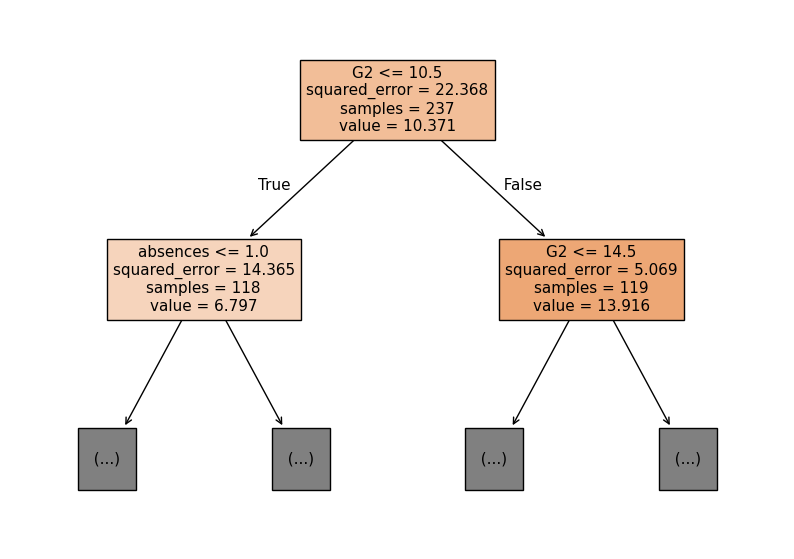

In [14]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

plt.figure(figsize=(10,7))
plot_tree(dt, max_depth=1, filled=True, feature_names=input_columns)
plt.show()

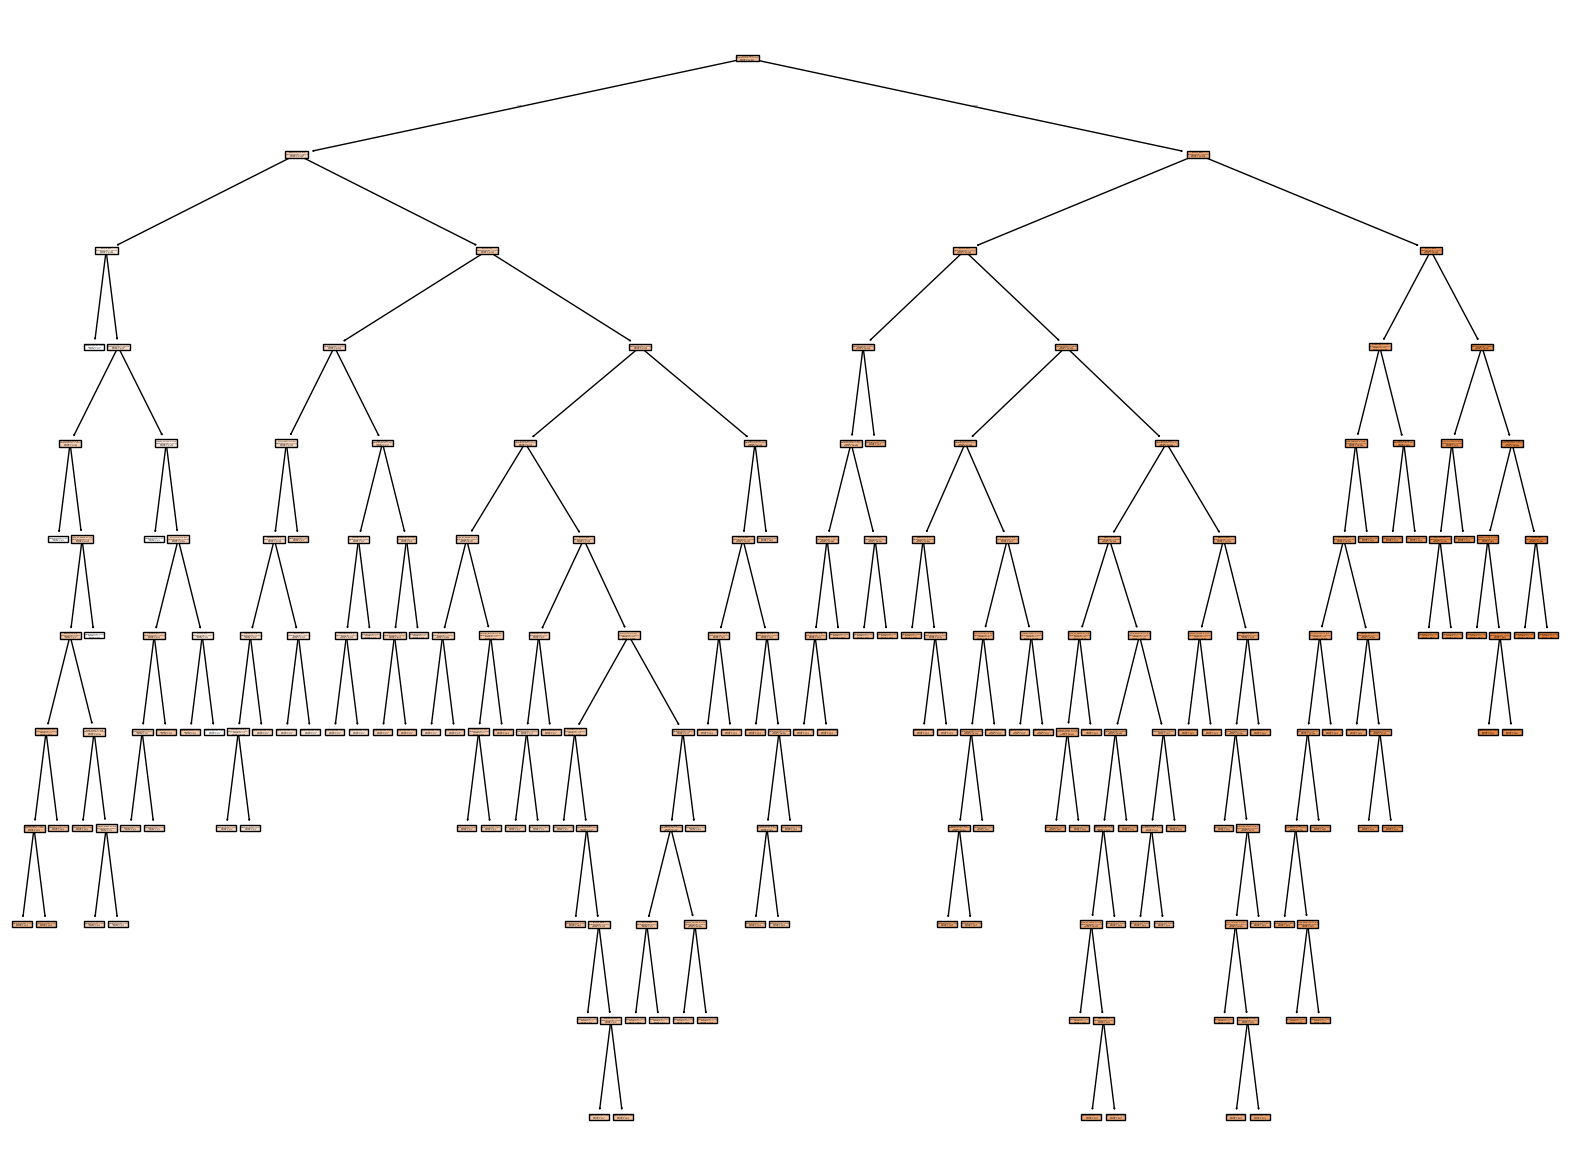

In [15]:
plt.figure(figsize=(20,15))
plot_tree(dt, filled=True, feature_names=input_columns)
plt.show()

In [16]:
dt= DecisionTreeRegressor(min_impurity_decrease=0.0005, random_state=42)
dt.fit(train_input, train_target)

print(dt.score(train_input, train_target))
print(dt.score(test_input,test_target))

1.0
0.7632402266129259


In [17]:
from sklearn.model_selection import cross_validate

scores = cross_validate(dt, train_input, train_target)
print(scores)

{'fit_time': array([0.00099707, 0.00099683, 0.0009973 , 0.00099206, 0.0010004 ]), 'score_time': array([0.        , 0.00100017, 0.        , 0.        , 0.        ]), 'test_score': array([0.69344905, 0.82608696, 0.58716972, 0.95694036, 0.78453545])}


In [18]:
import numpy as np
print(np.mean(scores['test_score']))

0.7696363082998868


In [19]:
params ={'min_impurity_decrease':np.arange(0.0001,0.001,0.0001),
         'max_depth':range(5,20,1),
         'min_samples_split': range(2,100,10)
         
         
         }

In [20]:
from sklearn.model_selection import GridSearchCV
gs = GridSearchCV(DecisionTreeRegressor(random_state=42), params, n_jobs=-1)
gs.fit(train_input, train_target)

GridSearchCV(estimator=DecisionTreeRegressor(random_state=42), n_jobs=-1,
             param_grid={'max_depth': range(5, 20),
                         'min_impurity_decrease': array([0.0001, 0.0002, 0.0003, 0.0004, 0.0005, 0.0006, 0.0007, 0.0008,
       0.0009]),
                         'min_samples_split': range(2, 100, 10)})

In [21]:
print(gs.best_params_)

{'max_depth': 5, 'min_impurity_decrease': 0.0001, 'min_samples_split': 22}


In [22]:
print(np.max(gs.cv_results_['mean_test_score']))

0.8514790413183064


In [23]:
from scipy.stats import uniform, randint

params = {'min_impurity_decrease': uniform(0.0001, 0.001),
          'max_depth': randint(20,50),
          'min_samples_split':randint(2,25),
          'min_samples_leaf':randint(1,25),
          
          }

In [24]:
from sklearn.model_selection import RandomizedSearchCV

gs = RandomizedSearchCV(DecisionTreeRegressor(random_state=42), params,
                        n_iter=100, n_jobs=-1, random_state=42)
gs.fit(train_input, train_target)

RandomizedSearchCV(estimator=DecisionTreeRegressor(random_state=42), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'max_depth': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x000002E64AB9E1E0>,
                                        'min_impurity_decrease': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x000002E64DD6C5F0>,
                                        'min_samples_leaf': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x000002E64D997200>,
                                        'min_samples_split': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x000002E64DAF5EE0>},
                   random_state=42)

In [25]:
print(gs.best_params_)

{'max_depth': 47, 'min_impurity_decrease': 0.00014522728891053807, 'min_samples_leaf': 8, 'min_samples_split': 22}


In [26]:
print(np.max(gs.cv_results_['mean_test_score']))

0.8637857138778291


In [27]:
dt=gs.best_estimator_

print(dt.score(test_input, test_target))
print(dt.score(train_input, train_target))

0.8312189021760324
0.9075538835881063


In [28]:
from lightgbm import LGBMRegressor

lgb = LGBMRegressor(random_state=42)
scores = cross_validate(lgb, train_input, train_target, return_train_score=True, n_jobs=-1)
print(np.mean(scores['train_score']), np.mean(scores['test_score']))

0.952298669244638 0.8441665567327762


In [29]:
from sklearn.ensemble import GradientBoostingRegressor

# 그라디언트 부스팅 모델 학습 및 평가
gb = GradientBoostingRegressor(random_state=42, n_estimators=300)
gb.fit(train_input, train_target)
gb_train_score = gb.score(train_input, train_target)
gb_test_score = gb.score(test_input, test_target)

print(f"Gradient Boosting Train score: {gb_train_score}")
print(f"Gradient Boosting Test score: {gb_test_score}")


Gradient Boosting Train score: 0.9929384785096271
Gradient Boosting Test score: 0.8731439067091127


In [30]:
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import GradientBoostingRegressor
# 그라디언트 부스팅 모델 학습 및 교차 검증
gb = GradientBoostingRegressor(random_state=42, n_estimators=50)
cv_scores = cross_val_score(gb, train_input, train_target, cv=5)

# 교차 검증 결과의 평균 정확도
cv_mean_score = cv_scores.mean()
print(f"Gradient Boosting CV Mean Score: {cv_mean_score}")

Gradient Boosting CV Mean Score: 0.8519504321659636


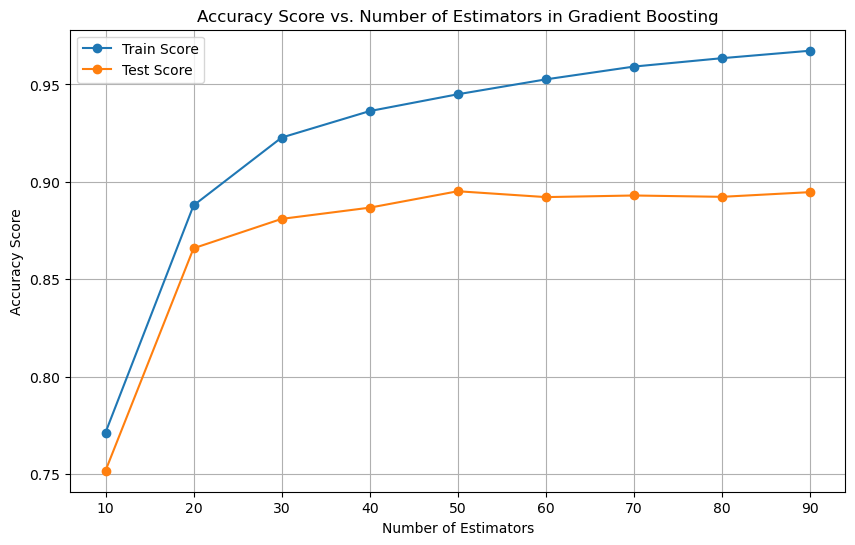

In [31]:
n_estimators_range = range(10, 100, 10)
train_scores = []
test_scores = []

for n in n_estimators_range:
    gb = GradientBoostingRegressor(random_state=42, n_estimators=n)
    gb.fit(train_input, train_target)
    train_scores.append(gb.score(train_input, train_target))
    test_scores.append(gb.score(test_input, test_target))

# 그래프로 나타내기
plt.figure(figsize=(10, 6))
plt.plot(n_estimators_range, train_scores, label='Train Score', marker='o')
plt.plot(n_estimators_range, test_scores, label='Test Score', marker='o')
plt.xlabel('Number of Estimators')
plt.ylabel('Accuracy Score')
plt.title('Accuracy Score vs. Number of Estimators in Gradient Boosting')
plt.legend()
plt.grid(True)
plt.show()

In [32]:
pd.read_csv("test_reduced_combined_encoded_data.csv") #낮은 특성중요도 제외한 데이터
test_input_columns = data.columns.drop(['G3'])  # 'G3' 컬럼을 제외한 모든 컬럼
test_grade_input = data[test_input_columns].to_numpy()
test_grade_target = data['G3'].to_numpy()



In [33]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor

# 랜덤 포레스트 하이퍼파라미터 범위 설정
param_grid_rf = {
    'n_estimators': [50,100,200,300],
    'max_depth': [3,4,5,6,7, 8],
    'min_samples_split': [2, 5, 10,15]
}

# GridSearchCV를 사용한 랜덤 포레스트 모델 최적화
rf = RandomForestRegressor(random_state=42)
grid_search_rf = GridSearchCV(estimator=rf, param_grid=param_grid_rf, cv=5, n_jobs=-1)
grid_search_rf.fit(train_input, train_target)

# 최적 모델로 재학습
best_rf = grid_search_rf.best_estimator_
best_rf.fit(train_input, train_target)

# 최적의 하이퍼파라미터와 점수 출력
best_params_rf = grid_search_rf.best_params_
best_score_rf = grid_search_rf.best_score_
print("Random Forest Best Parameters:", best_params_rf)
print("Random Forest Best Cross-Validation Score:", best_score_rf)


# 트레인 점수와 테스트 점수 출력
train_score_rf = best_rf.score(train_input, train_target)
test_score_rf = best_rf.score(test_grade_input, test_grade_target)
print(f"Random Forest Train Score: {train_score_rf}")
print(f"Random Forest Test Score: {test_score_rf}")


Random Forest Best Parameters: {'max_depth': 6, 'min_samples_split': 5, 'n_estimators': 200}
Random Forest Best Cross-Validation Score: 0.8688177005482431
Random Forest Train Score: 0.96229097456609
Random Forest Test Score: 0.9454844779519427
